## AlF

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
v_unit = 84e6*227.5e-9
m_unit = 227.5e-9/2/np.pi

In [3]:
# vx = v_unit*np.real(np.load("v.npy")[:,0])

In [4]:
data = np.load("out_AlF_osc_10ms_2photon_25-05-02.npz")
vx = np.real(data['v'][:,0])*v_unit
ts = np.array(data['ts'])/(2*np.pi*84e6)
# ts = np.linspace(0.,1.,1000)
stats = data['stats']

In [5]:
N_atom = 256

In [6]:
import lmfit
from scipy.stats import iqr
#print(2*np.std(v_final)**2*mass)
def normaldist(x, mu, sigma, dx):
    # Gaussian probability distribution function
    # probability of landing in a bin of width dx is p(x)dx
    return dx/sigma/np.sqrt(2*np.pi)*np.exp(-(x-mu)**2/2/sigma**2)

def lett_temperature(s, delta):
    """
    Returns the ratio of the expected temperature relative to the "bare" Doppler temperature.
    """
    return 0.5*(1+2*s+4*delta**2)/2/np.abs(delta)

def fit_vfinal(v_final, N_atom):
    dx = iqr(v_final)/N_atom**(1/3)
    xb = np.arange(dx/2, 1.1*np.amax(np.abs(v_final)), dx)
    xb = np.concatenate((-xb[::-1], xb))

    x = xb[:-1] + np.diff(xb)/2
    y = np.histogram(v_final, bins=xb)[0]/N_atom #Probability of an atom landing in this bin.'

    ok = (y>0)
    weights = np.zeros(ok.shape)
    weights[ok] = 1./np.sqrt(y[ok]/N_atom)
    model = lmfit.Model(normaldist)
    params = model.make_params()
    params['dx'].value = dx # bin width, probability of landing in the bin is p(x) dx
    params['dx'].vary = False
    params['mu'].value = 0.
    params['mu'].vary = False
    params['sigma'].value = np.std(v_final)

    result = model.fit(y[ok], params, x=x[ok], weights=weights[ok])

    return result, x, y, dx

In [7]:
vx[~np.isnan(vx)]

array([ 0.        ,  0.17787538,  0.16281989, ..., -2.56974464,
       -2.4218743 , -2.54730601])

In [8]:
ress = []
for i in range(1000):
    result, x, y, dx = fit_vfinal(vx[:,i], N_atom)
    ress.append([result, x, y, dx])
    if i != 999:
        continue
    
    fig, ax = plt.subplots(1, 1)
    ax.bar(x, y, width=0.8*dx, yerr=np.sqrt(y/N_atom)) #Poissonian error
    x_fit = np.linspace(-1.1*np.amax(np.abs(vx[:,i])), 1.1*np.amax(np.abs(vx[:,i])), 101)
    ax.plot(x_fit, result.eval(x=x_fit), 'r-')
    # ax.plot(x_fit, normaldist(x_fit, 0, np.sqrt(lett_temperature(0.3*6, 0.5)/2/46*1.66e-27), dx))

    ax.set_ylabel('$p(v_{\\rm final}) dx$')
    ax.set_xlabel('$v_{\\rm final}/(m/s)$');

C:\Users\LP618\AppData\Local\Temp\ipykernel_19744\3845891996.py:17: RuntimeWarning: invalid value encountered in double_scalars
  xb = np.arange(dx/2, 1.1*np.amax(np.abs(v_final)), dx)


ValueError: arange: cannot compute length

In [ ]:
result, x, y, dx = ress[-1]

fig, ax = plt.subplots(1, 1)
ax.bar(x, y, width=0.8*dx, yerr=np.sqrt(y/N_atom)) #Poissonian error
x_fit = np.linspace(-1.1*np.amax(np.abs(vx[:,i])), 1.1*np.amax(np.abs(vx[:,i])), 101)
ax.plot(x_fit, result.eval(x=x_fit), 'r-')
# ax.plot(x_fit, normaldist(x_fit, 0, np.sqrt(lett_temperature(0.3*6, 0.5)/2/46*1.66e-27), dx))

ax.set_ylabel('$p(v_{\\rm final}) dx$')
ax.set_xlabel('$v_{\\rm final}/(m/s)$');

IndexError: list index out of range

In [ ]:
result

NameError: name 'result' is not defined

In [ ]:
print(result.params["sigma"].value**2*46*1.66e-27*1e3/1.38e-23,"mK")

11.230274175901798 mK


ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)

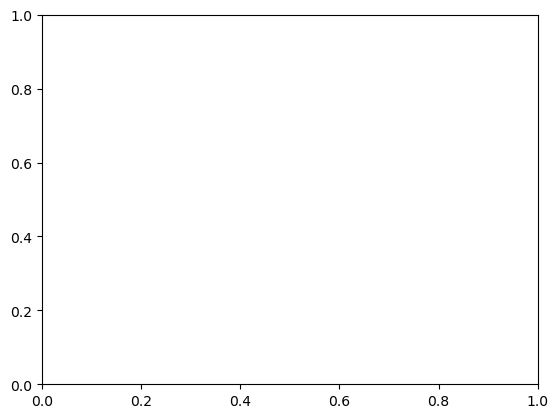

In [12]:
fig, ax = plt.subplots(1,1)
ax.plot(ts[0]*1e3,[res[0].params["sigma"].value**2*46*1.66e-27*1e3/1.38e-23 for res in ress])
ax.grid()
ax.set_xlabel("t [ms]")
ax.set_ylabel("T [mK]")
# ax.set_ylim([0,350])

Text(0, 0.5, 'T [mK]')

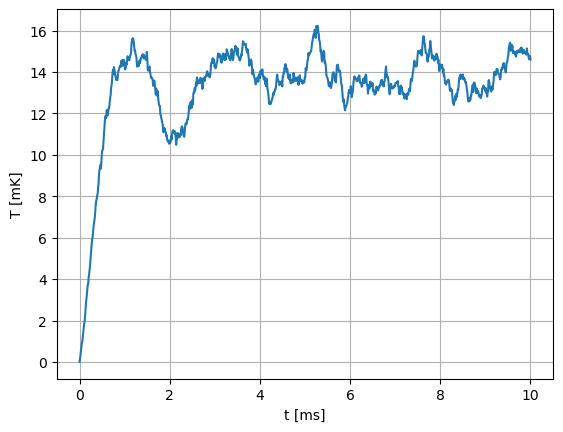

In [13]:
fig, ax = plt.subplots(1,1)
ax.plot(ts[0]*1e3,np.mean(vx**2, axis=0)*46*1.66e-27*1e3/1.38e-23)
ax.grid()
ax.set_xlabel("t [ms]")
ax.set_ylabel("T [mK]")

Text(0, 0.5, 'v [m/s]')

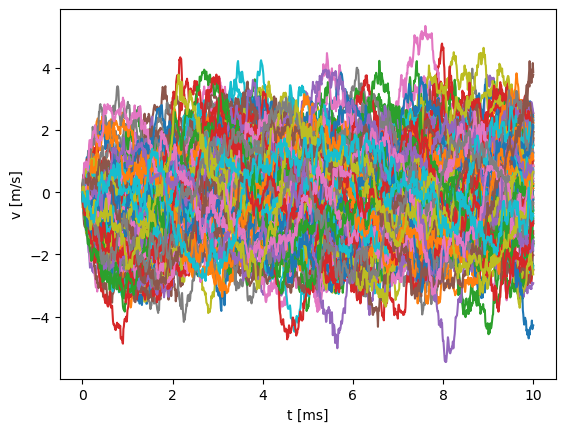

In [ ]:
[plt.plot(ts[0]*1e3, v) for v in vx[:100]]
plt.xlabel("t [ms]")
plt.ylabel("v [m/s]")

In [ ]:
# d = np.load("out_AlF_temp.npz")
# data = {}
# data['v'] = d['v']
# data['stats'] = d['stats']
# data['ts'] = d['ts']
# data['r'] = np.load('r.npy')

Text(0, 0.5, '$\\mu$ [$\\mu$m]')

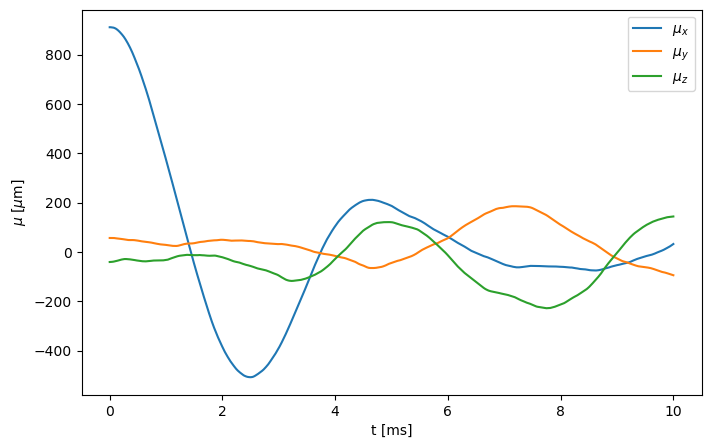

In [ ]:
fig, ax = plt.subplots(1,1,figsize=[8,5])
ax.plot(ts[0]*1e3, np.mean(data['r'][:,0]*m_unit*1e6, axis=0), label="$\\mu_x$")
ax.plot(ts[0]*1e3, np.mean(data['r'][:,1]*m_unit*1e6, axis=0), label="$\\mu_y$")
ax.plot(ts[0]*1e3, np.mean(data['r'][:,2]*m_unit*1e6, axis=0), label="$\\mu_z$")

ax.legend()
ax.set_xlabel("t [ms]")
ax.set_ylabel("$\\mu$ [$\\mu$m]")

In [14]:
fitfunc = lambda t, *args: args[0]*np.exp(-args[1]*t/2)*np.cos(np.sqrt((args[2])**2 - (args[1])**2/4)*t + args[3]) + args[4]

In [15]:
from scipy.optimize import curve_fit

In [16]:
fit, cov = curve_fit(fitfunc, ts[0], np.mean(data['r'][:,0]*m_unit*1e6, axis=0), p0=[2000,800,2200,0,0], maxfev=100000)

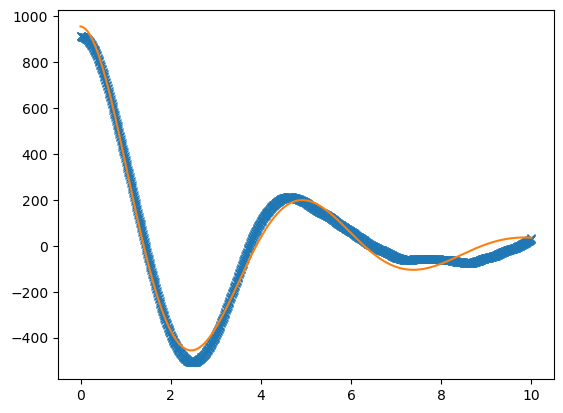

In [17]:
plt.figure()
plt.plot(ts[0]*1e3, np.mean(data['r'][:,0]*m_unit*1e6, axis=0),'x')
plt.plot(ts[0]*1e3, fitfunc(ts[0],*fit))

In [20]:
print("beta = ",fit[1],"+-",np.sqrt(cov[1,1]),"1/s")
print("omega = ",fit[2],"+-",np.sqrt(cov[2,2]),"1/s")
print((fit[2])**2/(fit[1]))

beta =  623.7528888594229 +- 5.106712530397735 1/s
omega =  1313.277723626819 +- 3.304369538979263 1/s
2765.0346959164785


(array([ 99., 106.,  98.,  75.,  57.,  52.,  61.,  68., 201., 183.]),
 array([-2346.94134945, -1959.58216543, -1572.22298141, -1184.86379738,
         -797.50461336,  -410.14542934,   -22.78624532,   364.57293871,
          751.93212273,  1139.29130675,  1526.65049077]),
 <BarContainer object of 10 artists>)

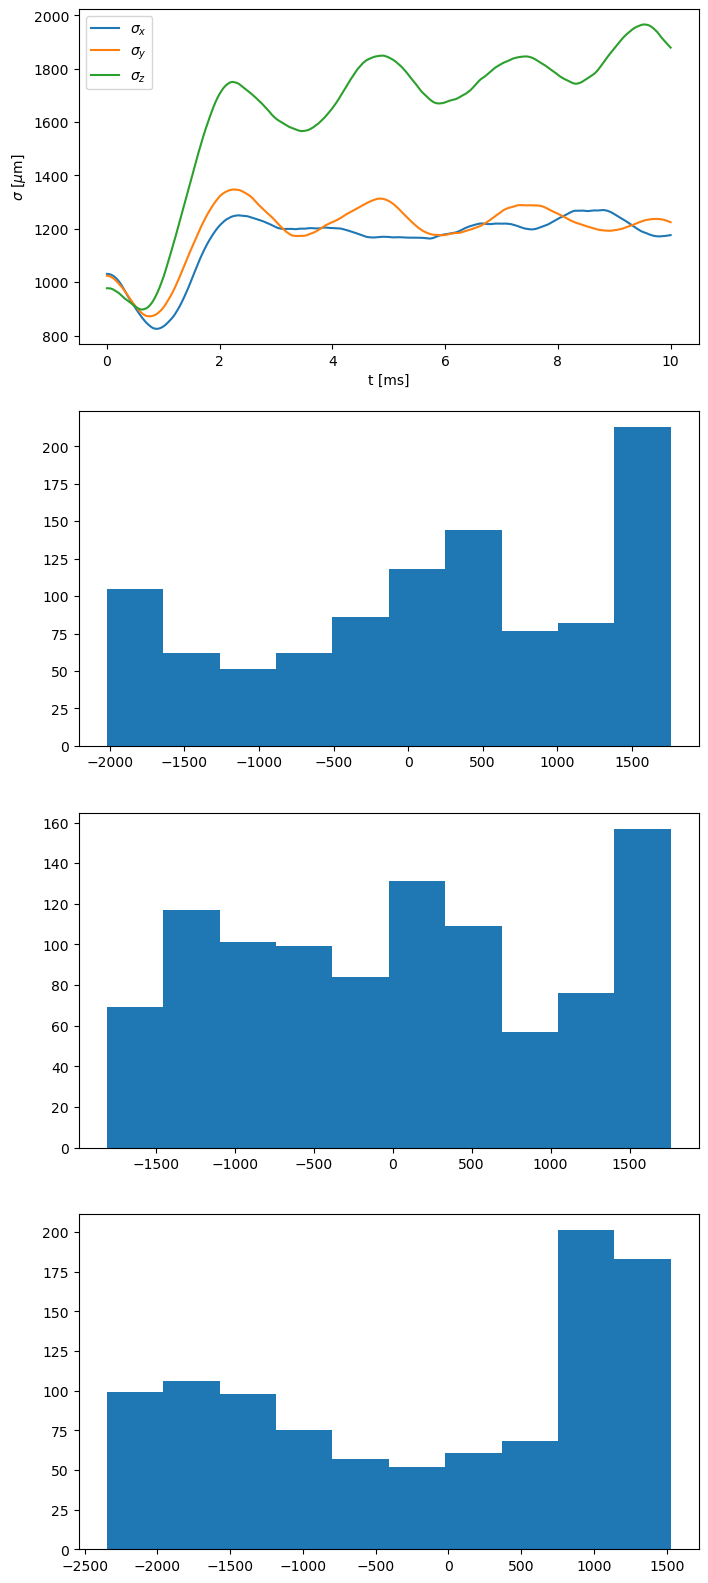

In [20]:
fig, (ax, axx, axy, axz) = plt.subplots(4,1,figsize=[8,20])
ax.plot(ts[0]*1e3, np.std(data['r'][:,0]*m_unit*1e6, axis=0), label="$\\sigma_x$")
ax.plot(ts[0]*1e3, np.std(data['r'][:,1]*m_unit*1e6, axis=0), label="$\\sigma_y$")
ax.plot(ts[0]*1e3, np.std(data['r'][:,2]*m_unit*1e6, axis=0), label="$\\sigma_z$")
ax.legend()
ax.set_xlabel("t [ms]")
ax.set_ylabel("$\\sigma$ [$\\mu$m]")

axx.hist(data['r'][-1,0]*m_unit*1e6)
axy.hist(data['r'][-1,1]*m_unit*1e6)
axz.hist(data['r'][-1,2]*m_unit*1e6)

# ax.set_xlim(0,0.2)
# ax.set_ylim(800,1500)

Text(0.5, 0, 'd [$\\mu$m]')

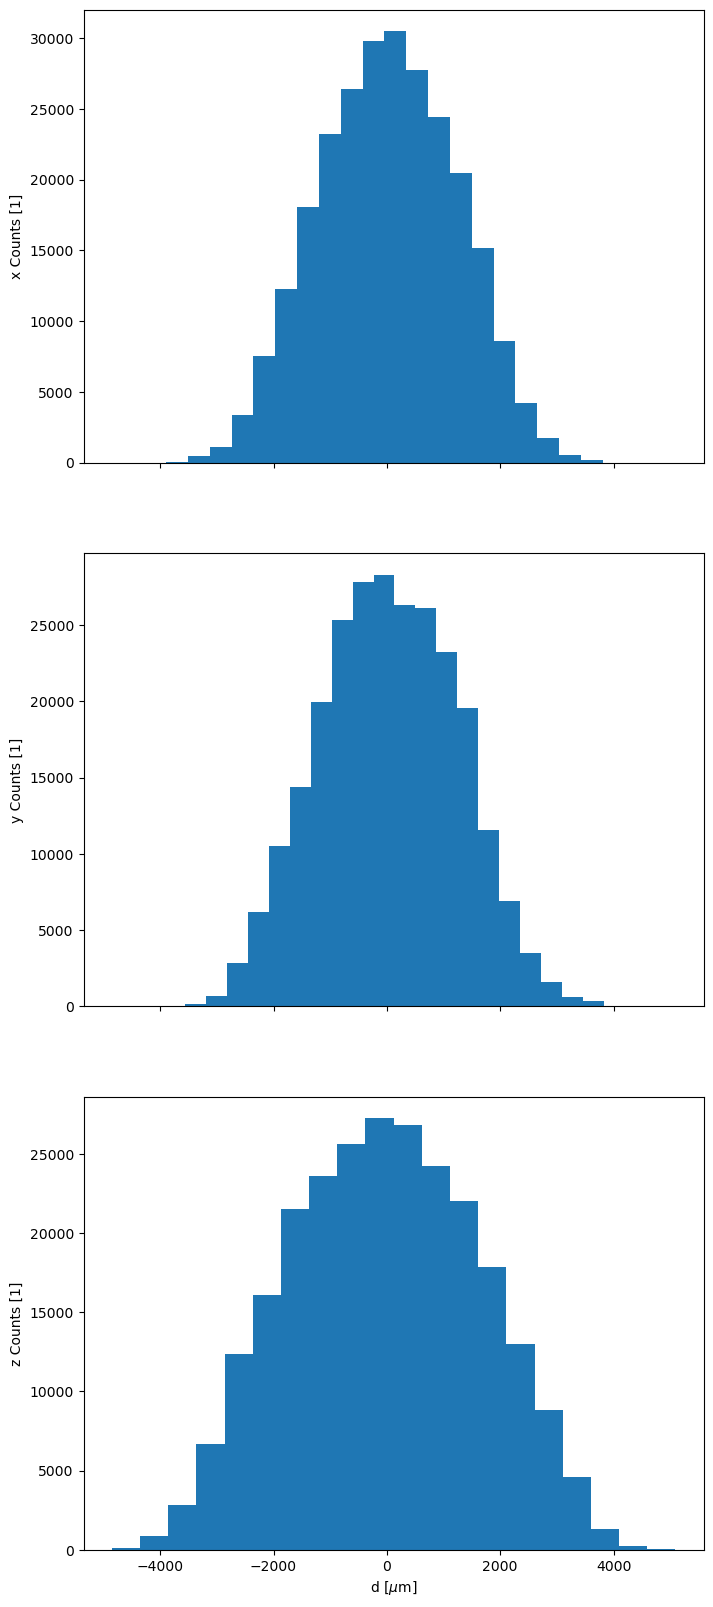

In [21]:
fig, (axx, axy, axz) = plt.subplots(3,1,figsize=[8,20], sharex=True)

axx.hist(data['r'][:,0].reshape((256*1000,))*m_unit*1e6,bins=20)
axx.set_ylabel("x Counts [1]")
axy.hist(data['r'][:,1].reshape((256*1000,))*m_unit*1e6,bins=20)
axy.set_ylabel("y Counts [1]")
axz.hist(data['r'][:,2].reshape((256*1000,))*m_unit*1e6,bins=20)
axz.set_ylabel("z Counts [1]")
axz.set_xlabel("d [$\\mu$m]")

In [22]:
# %matplotlib

In [23]:
import numpy.linalg as lin
import cmcrameri.cm as scicmap
import matplotlib.colors as mcolors

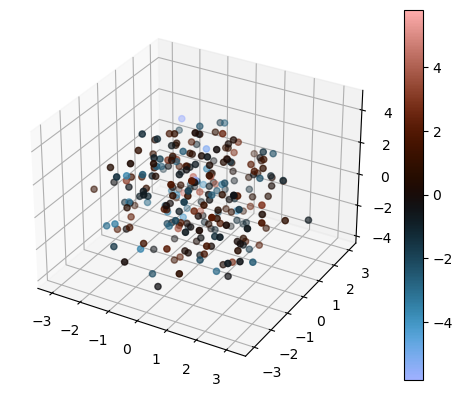

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

vl = np.real(data['v']*v_unit)[:,:,-1]
rs = np.array([lin.norm(np.real(data['r'])[:,:,-1],axis=1)]*3).T
rl = np.real(data['r'])[:,:,-1]/rs

vt = np.einsum("ij,ij->i",rl,vl)

a = ax.scatter(np.real(data['r'])[:,0,-1]*1000*m_unit,np.real(data['r'])[:,1,-1]*1000*m_unit,np.real(data['r'])[:,2,-1]*1000*m_unit, c = vt, cmap=scicmap.berlin,norm=mcolors.CenteredNorm(0))
plt.colorbar(a)
# plt.xlim(-1,1)
# plt.ylim(-1,1)

(-4.5, 4.5)

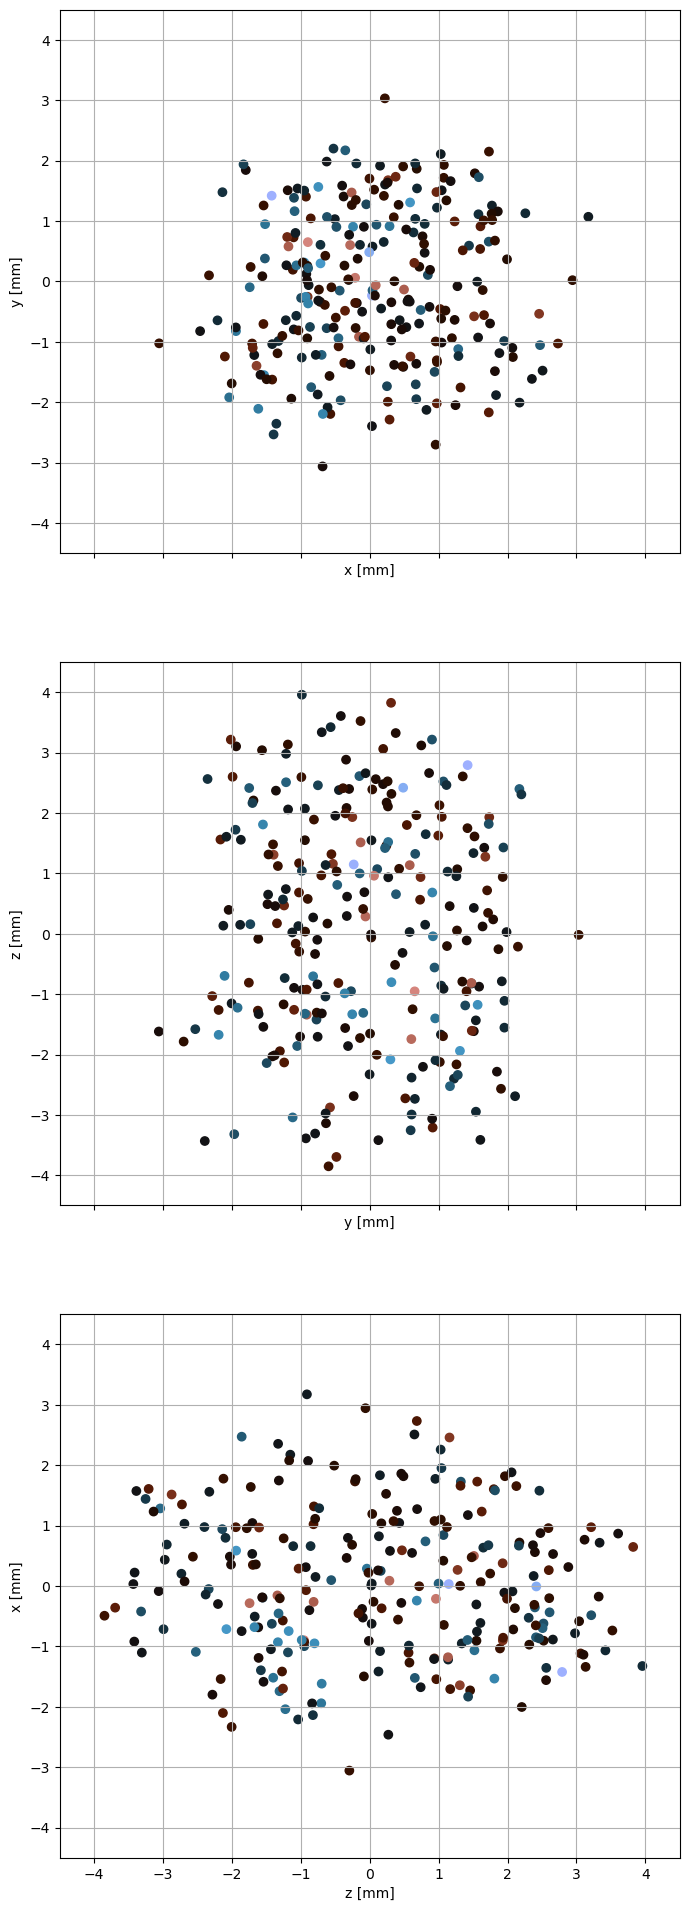

In [25]:
fig, (axxy, axyz, axzx) = plt.subplots(3,1,sharex=True,sharey=True,figsize=[8,24])

vl = np.real(data['v']*v_unit)[:,:,-1]
rs = np.array([lin.norm(np.real(data['r'])[:,:,-1],axis=1)]*3).T
rl = np.real(data['r'])[:,:,-1]/rs

vt = np.einsum("ij,ij->i",rl,vl)

axxy.scatter(np.real(data['r'])[:,0,-1]*1000*m_unit,np.real(data['r'])[:,1,-1]*1000*m_unit, c = vt, cmap=scicmap.berlin,norm=mcolors.CenteredNorm(0))
axxy.set_xlabel("x [mm]")
axxy.set_ylabel("y [mm]")
axxy.grid()

axyz.scatter(np.real(data['r'])[:,1,-1]*1000*m_unit,np.real(data['r'])[:,2,-1]*1000*m_unit, c = vt, cmap=scicmap.berlin,norm=mcolors.CenteredNorm(0))
axyz.set_xlabel("y [mm]")
axyz.set_ylabel("z [mm]")
axyz.grid()

axzx.scatter(np.real(data['r'])[:,2,-1]*1000*m_unit,np.real(data['r'])[:,0,-1]*1000*m_unit, c = vt, cmap=scicmap.berlin,norm=mcolors.CenteredNorm(0))
axzx.set_xlabel("z [mm]")
axzx.set_ylabel("x [mm]")
axzx.grid()

axxy.set_xlim(-4.5,4.5)
axxy.set_ylim(-4.5,4.5)

# plt.xlim(-1,1)
# plt.ylim(-1,1)

In [27]:
%matplotlib

Using matplotlib backend: QtAgg


In [ ]:
import matplotlib.animation as animation
import matplotlib as mpl

fig, (axxy, axyz, axzx) = plt.subplots(3,1,sharex=True,sharey=True,figsize=[8,24])

# cbar = fig.add_subfigure()

vl = np.real(data['v']*v_unit)[:,:,-1]
rs = np.array([lin.norm(np.real(data['r'])[:,:,-1],axis=1)]*3).T
rl = np.real(data['r'])[:,:,-1]/rs

vt = np.einsum("ij,ij->i",rl,vl)

vla = np.real(data['v']*v_unit)[:,:,:]
rsa = lin.norm(np.real(data['r'])[:,:,:],axis=1)
# rl = np.real(data['r'])[:,:,:]/rs
rsa[np.isclose(rsa,0)] = 1

vta = np.einsum("ik,ijk,ijk->ik",1/rsa,vla,np.real(data['r'])[:,:,:])

norm = mcolors.CenteredNorm(0,5)

# bg = fig.canvas.copy_from_bbox(fig.bbox)

xy = axxy.scatter(np.real(data['r'])[:,0,-1]*1000*m_unit,np.real(data['r'])[:,1,-1]*1000*m_unit, cmap=scicmap.berlin,norm=norm, marker = 'o')
axxy.set_xlabel("x [mm]")
axxy.set_ylabel("y [mm]")
axxy.grid()

yz = axyz.scatter(np.real(data['r'])[:,1,-1]*1000*m_unit,np.real(data['r'])[:,2,-1]*1000*m_unit, cmap=scicmap.berlin,norm=norm, marker = 'o')
axyz.set_xlabel("y [mm]")
axyz.set_ylabel("z [mm]")
axyz.grid()

zx = axzx.scatter(np.real(data['r'])[:,2,-1]*1000*m_unit,np.real(data['r'])[:,0,-1]*1000*m_unit, cmap=scicmap.berlin,norm=norm, marker = 'o')
axzx.set_xlabel("z [mm]")
axzx.set_ylabel("x [mm]")
axzx.grid()

axxy.set_xlim(-4.5,4.5)
axxy.set_ylim(-4.5,4.5)

axxy.set_aspect("equal")
axyz.set_aspect("equal")
axzx.set_aspect("equal")

# xy.set_animated(True)
# yz.set_animated(True)
# zx.set_animated(True)

fig.suptitle("6 ms")

axc = fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=scicmap.berlin), ax=fig.get_axes())
axc.set_label("$v_t$ [m/s]")

xy.set_cmap(scicmap.berlin)
yz.set_cmap(scicmap.berlin)
zx.set_cmap(scicmap.berlin)

xy.set_norm(norm)
yz.set_norm(norm)
zx.set_norm(norm)

def update(frame):
    
    # fig.canvas.restore_region(bg)
    # x = np.real(data['r'])[:,0,frame]*1000*m_unit
    # y = np.real(data['r'])[:,1,frame]*1000*m_unit
    # z = np.real(data['r'])[:,2,frame]*1000*m_unit
    
    vt = vta[:,frame]
    
    # xy.set_offsets(np.stack([x,y]).T)
    # yz.set_offsets(np.stack([y,z]).T)
    # zx.set_offsets(np.stack([z,x]).T)
    
    
    xy.set_offsets(np.real(data['r'])[:,(0,1),frame]*1000*m_unit)
    yz.set_offsets(np.real(data['r'])[:,(1,2),frame]*1000*m_unit)
    zx.set_offsets(np.real(data['r'])[:,(2,0),frame]*1000*m_unit)
    
    rgba = xy.to_rgba(vt)
    fig.suptitle(f"{ts[0,frame]*1000:.3} ms")
    
    
    xy.set_color(rgba)
    yz.set_color(rgba)
    zx.set_color(rgba)
    # xy.set_color([0,0,0,0])
    
    # xy.set_facecolors(vt)
    # yz.set_color(vt)
    # zx.set_color(vt)
    
    # xy.draw()
    # yz.draw()
    # zx.draw()
    
    # axxy.draw_artist(xy)
    # axyz.draw_artist(yz)
    # axzx.draw_artist(zx)
    # fig.canvas.blit(fig.bbox)
    # fig.canvas.flush_events()
    
    return (xy,yz,zx)

ani = animation.FuncAnimation(fig=fig, func=update, frames=1000, interval=10)

writer = animation.PillowWriter(fps=100,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('Dynamics_osc_25-05-02.gif', writer=writer)

# plt.xlim(-1,1)
# plt.ylim(-1,1)

: 

In [80]:
plt.plot(vta[1])

In [68]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

vl = np.real(data['v']*v_unit)[:,:,::50]
rs = lin.norm(np.real(data['r'])[:,:,::50],axis=1)
# rl = np.real(data['r'])[:,:,:]/rs

vt = np.einsum("ik,ijk,ijk->ik",1/rs,vl,np.real(data['r'])[:,:,::50])

imax = 100

norm = mcolors.CenteredNorm(0,halfrange=8)
[ax.scatter(np.real(data['r'])[i,0,::50]*1000*m_unit,np.real(data['r'])[i,1,::50]*1000*m_unit,np.real(data['r'])[i,2,::50]*1000*m_unit, c = vt[i], cmap=scicmap.berlin,norm=norm) for i in range(imax)]
a = ax.scatter(np.real(data['r'])[imax,0,::50]*1000*m_unit,np.real(data['r'])[imax,1,::50]*1000*m_unit,np.real(data['r'])[imax,2,::50]*1000*m_unit, c = vt[imax], cmap=scicmap.berlin,norm=norm)

plt.colorbar(a)
# plt.xlim(-1,1)
# plt.ylim(-1,1)

## Rb

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
v_unit = 5.75e6*794.97851156e-9
mm_unit = 1000*794.97851156e-9/2/np.pi

In [3]:
data = np.load("out_Rb_temp-10.npz")
vx = data['v'][:,0]*v_unit
ts = data['ts']/(2*np.pi*5.75e6)
stats = data['stats']

In [4]:
data.files

['v', 'r', 'ts', 'stats']

In [5]:
N_atom = 256

In [6]:
import lmfit
from scipy.stats import iqr
#print(2*np.std(v_final)**2*mass)
def normaldist(x, mu, sigma, dx):
    # Gaussian probability distribution function
    # probability of landing in a bin of width dx is p(x)dx
    return dx/sigma/np.sqrt(2*np.pi)*np.exp(-(x-mu)**2/2/sigma**2)

def lett_temperature(s, delta):
    """
    Returns the ratio of the expected temperature relative to the "bare" Doppler temperature.
    """
    return 0.5*(1+2*s+4*delta**2)/2/np.abs(delta)

def fit_vfinal(v_final, N_atom):
    dx = 2*iqr(v_final)/N_atom**(1/3)
    xb = np.arange(dx/2, 1.1*np.amax(np.abs(v_final)), dx)
    xb = np.concatenate((-xb[::-1], xb))

    x = xb[:-1] + np.diff(xb)/2
    y = np.histogram(v_final, bins=xb)[0]/N_atom #Probability of an atom landing in this bin.'

    ok = (y>0)
    weights = np.zeros(ok.shape)
    weights[ok] = 1./np.sqrt(y[ok]/N_atom)
    model = lmfit.Model(normaldist)
    params = model.make_params()
    params['dx'].value = dx # bin width, probability of landing in the bin is p(x) dx
    params['dx'].vary = False
    params['mu'].value = 0.
    params['mu'].vary = False
    params['sigma'].value = np.std(v_final)

    result = model.fit(y[ok], params, x=x[ok], weights=weights[ok])

    return result, x, y, dx

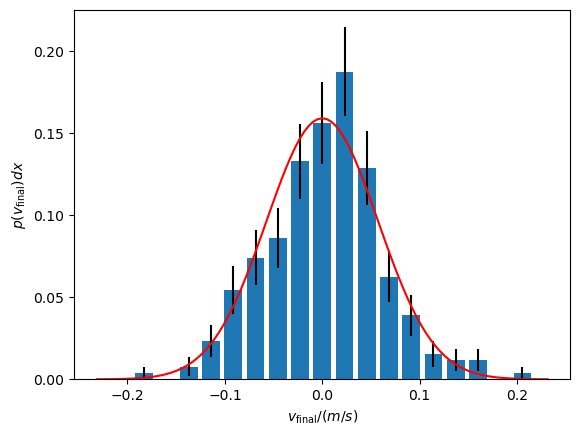

In [7]:
ress = []
for i in range(1000):
    result, x, y, dx = fit_vfinal(vx[:,i], N_atom)
    ress.append([result, x, y, dx])
    if i != 999:
        continue
    
    fig, ax = plt.subplots(1, 1)
    ax.bar(x, y, width=0.8*dx, yerr=np.sqrt(y/N_atom)) #Poissonian error
    x_fit = np.linspace(-1.1*np.amax(np.abs(vx[:,i])), 1.1*np.amax(np.abs(vx[:,i])), 101)
    ax.plot(x_fit, result.eval(x=x_fit), 'r-')
    # ax.plot(x_fit, normaldist(x_fit, 0, np.sqrt(lett_temperature(0.3*6, 0.5)/2/46*1.66e-27), dx))

    ax.set_ylabel('$p(v_{\\rm final}) dx$')
    ax.set_xlabel('$v_{\\rm final}/(m/s)$');

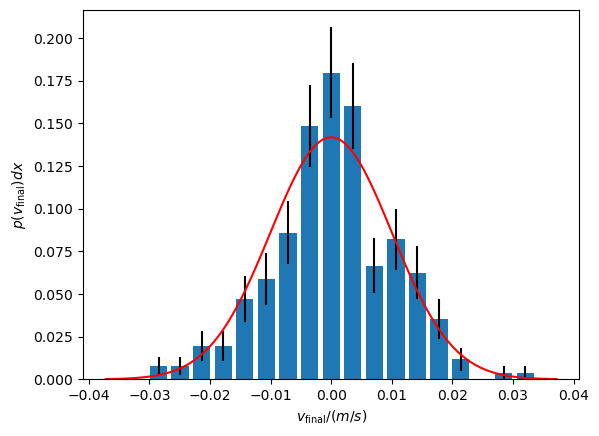

In [8]:
i = 0
result, x, y, dx = ress[i]

fig, ax = plt.subplots(1, 1)
ax.bar(x, y, width=0.8*dx, yerr=np.sqrt(y/N_atom)) #Poissonian error
x_fit = np.linspace(-1.1*np.amax(np.abs(vx[:,i])), 1.1*np.amax(np.abs(vx[:,i])), 101)
ax.plot(x_fit, result.eval(x=x_fit), 'r-')
# ax.plot(x_fit, normaldist(x_fit, 0, np.sqrt(lett_temperature(0.3*6, 0.5)/2/46*1.66e-27), dx))

ax.set_ylabel('$p(v_{\\rm final}) dx$')
ax.set_xlabel('$v_{\\rm final}/(m/s)$');

In [9]:
result

In [10]:
print(result.params["sigma"].value**2*87*1.66e-27*1e3/1.38e-23,"mK")

0.0010497312312933956 mK


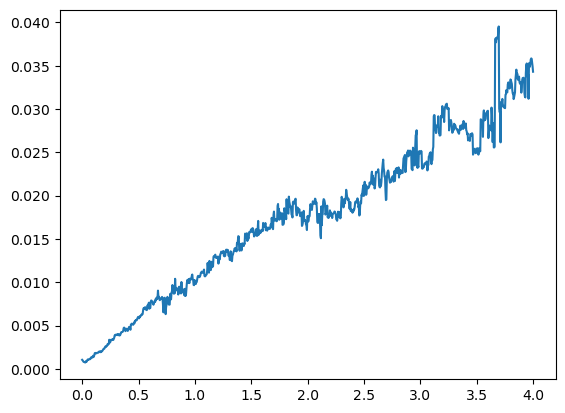

In [11]:
fig, ax = plt.subplots(1,1)
ax.plot(ts[0]*1e3,[res[0].params["sigma"].value**2*87*1.66e-27*1e3/1.38e-23 for res in ress])


In [12]:
np.std(vx, axis=0).shape

(1000,)

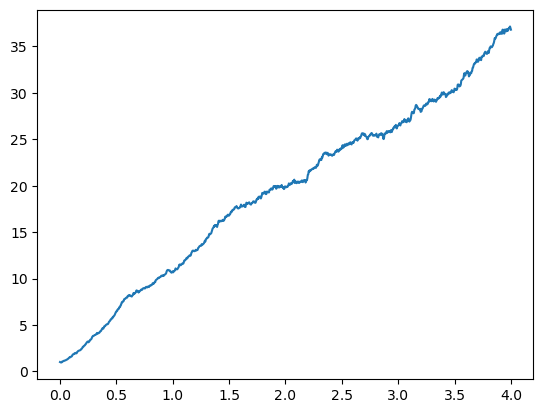

In [13]:
fig, ax = plt.subplots(1,1)
ax.plot(ts[0]*1e3,np.mean(vx**2, axis=0)*87*1.66e-27*1e6/1.38e-23)

In [14]:
N_atom

256

In [15]:
def get_temp(file):
    data = np.load(file)
    vx = data['v'][:,0]*v_unit
    ts = data['ts']/(2*np.pi*5.75e6)
    stats = data['stats']
    
    ress = []
    for i in range(1000):
        result, x, y, dx = fit_vfinal(vx[:,i], N_atom)
        ress.append([result, x, y, dx])


    return (ts, [res[0].params["sigma"].value**2*87*1.66e-27*1e3/1.38e-23 for res in ress], np.mean(vx**2, axis=0)*87*1.66e-27*1e3/1.38e-23)

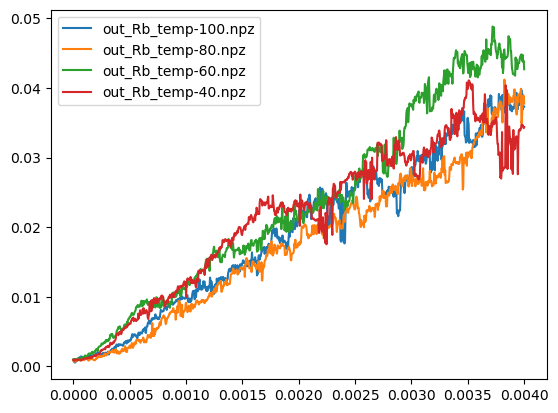

In [16]:
[plt.plot(t[0], temps, label=i) for i,(t, temps, mean_temps) in [(i,get_temp(i)) for i in ("out_Rb_temp-100.npz", "out_Rb_temp-80.npz", 'out_Rb_temp-60.npz', 'out_Rb_temp-40.npz')]]
plt.legend()

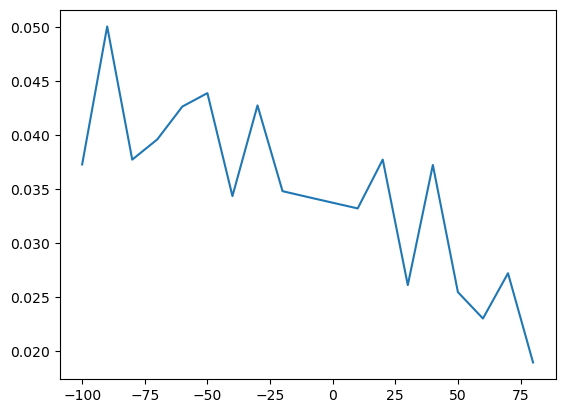

In [17]:
dets = [-100,  -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20, -10,   10,   20,   30,   40,   50,   60,   70,   80]
temps = [get_temp(f"out_Rb_temp{det}.npz")[1][-1] for det in dets]
plt.plot(dets, temps)

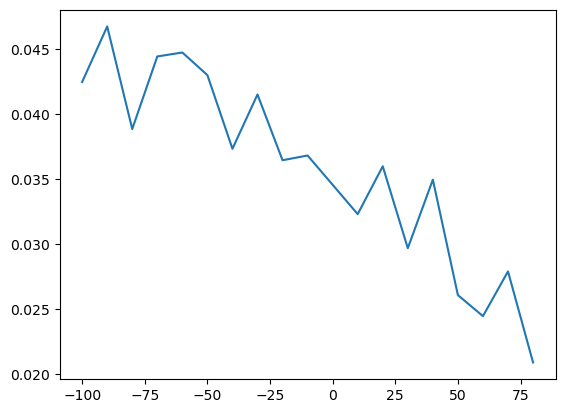

In [18]:
dets = [-100,  -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20, -10,   10,   20,   30,   40,   50,   60,   70,   80]
temps = [get_temp(f"out_Rb_temp{det}.npz")[2][-1] for det in dets]
plt.plot(dets, temps)

(array([ 1.,  1.,  1.,  2.,  0.,  1.,  4.,  2.,  0.,  2.,  4.,  4.,  0.,
         6.,  8.,  6.,  0.,  9., 11.,  9.,  0., 11., 10., 22.,  0., 11.,
        20., 12., 11.,  0., 16., 13., 10.,  0.,  8.,  7.,  7.,  0.,  3.,
         6.,  6.,  0.,  3.,  3.,  1.,  0.,  2.,  1.,  0.,  2.]),
 array([28.  , 28.76, 29.52, 30.28, 31.04, 31.8 , 32.56, 33.32, 34.08,
        34.84, 35.6 , 36.36, 37.12, 37.88, 38.64, 39.4 , 40.16, 40.92,
        41.68, 42.44, 43.2 , 43.96, 44.72, 45.48, 46.24, 47.  , 47.76,
        48.52, 49.28, 50.04, 50.8 , 51.56, 52.32, 53.08, 53.84, 54.6 ,
        55.36, 56.12, 56.88, 57.64, 58.4 , 59.16, 59.92, 60.68, 61.44,
        62.2 , 62.96, 63.72, 64.48, 65.24, 66.  ]),
 <BarContainer object of 50 artists>)

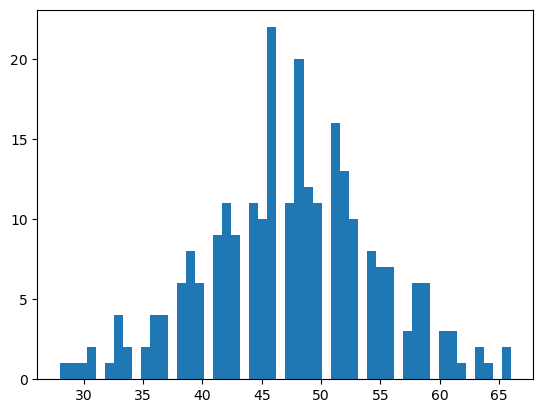

In [19]:
plt.hist(stats[:,1],bins=50)

[[<matplotlib.lines.Line2D at 0x12288af37c0>]]

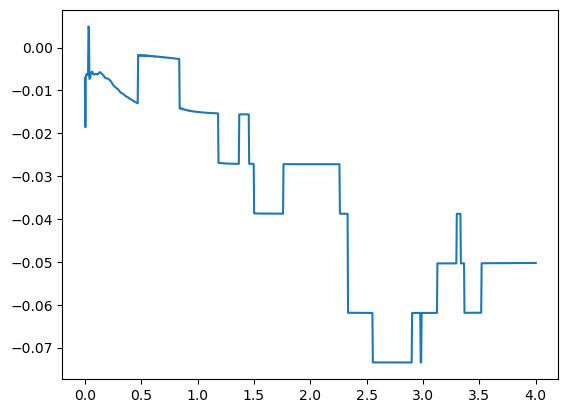

In [20]:
[plt.plot(ts[0]*1e3, v) for v in vx[:1]]

Text(0, 0.5, 'v [m/s]')

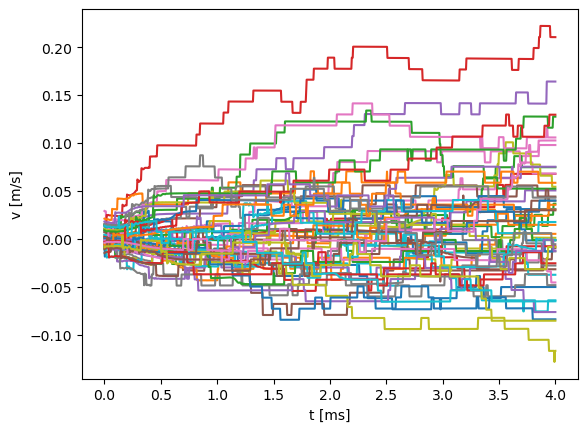

In [21]:
[plt.plot(ts[0]*1e3, v) for v in vx[:50]]
plt.xlabel("t [ms]")
plt.ylabel("v [m/s]")

Text(0, 0.5, 'Count')

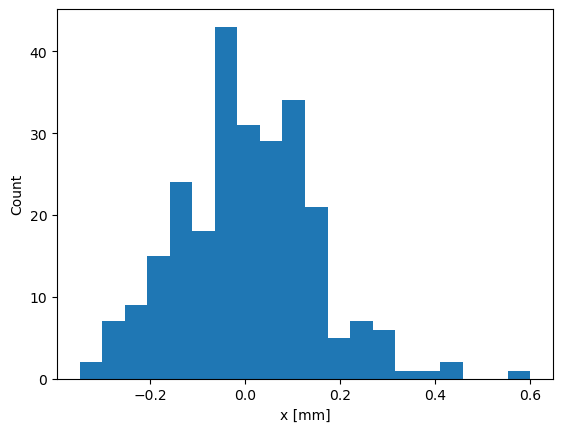

In [22]:
plt.hist(data['r'][:,0,-1]*mm_unit,bins=20)
plt.xlabel("x [mm]")
plt.ylabel("Count")